# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [84]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)


In [85]:
visa = pd.read_csv('EasyVisa.csv')
df = visa.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the datase

In [86]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [87]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


### Understand the shape of the dataset.

In [88]:
df.shape

(25480, 12)

- The dataset has 25480 rows and 12 columns.

### Check the data types of the columns for the dataset.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- case_status is the dependent variable which is an object type.
- There are three independent variables of numeric type while the rest variables are object.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [90]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00000,NaN,NaN,NaN,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,NaN,NaN,NaN,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00000,NaN,NaN,NaN,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

- The percentage of certified visa was 67% while 33% were denied.
- The employees came from 6 different continents, more than 50% are from Asia.
- Most of the employees have Bachelor degree, job experience and do not require any job training.
- The minimum number of employees is -26 (negative) which does not make sense and need to cheak it.
- The oldest company was established in 1800 while the nwest was esablished in 2016.
- Foreign worker's intended 5 regions of employment in the US, and the most popular region is Northeast.
- The average wage is $74455 with $52815 standard deviation.
- Unit of prevailing wage include Hourly, Weekly, Monthly, and Yearly.
- More than 50% of the work is full-time while the rest is part-time.



In [91]:
# Changing negative numbers in 'no_of_employees' to positive
df['no_of_employees'] = df['no_of_employees'].apply(lambda x : x if x > 0 else x*(-1))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.08921,22877.91745,11.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


- The minimum number of employees in the employer's company is 11 while the maximum is 602069.

### Number of unique values in each column

In [92]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

- We can drop 'case_id' column as it is an ID variable and will not add value to the model.

In [93]:
#Dropping two columns from the dataframe
df.drop(columns=['case_id'], inplace=True)

In [94]:
cat_cols=['continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
------------------------------
Certified    17018
Denied        8462
Name: case_status, dtype: int64
---------

### Univariate Analysis

In [95]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [96]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Number of employees

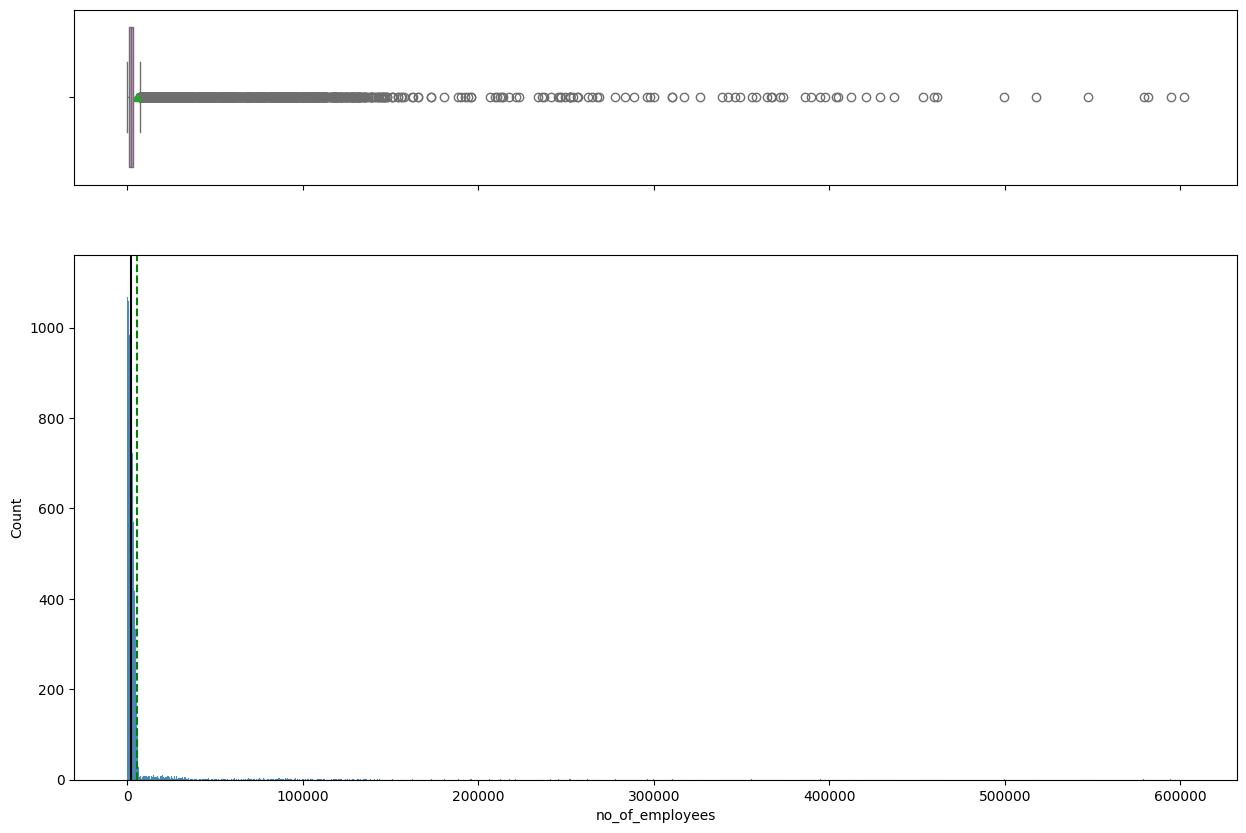

In [97]:
histogram_boxplot(df, "no_of_employees")

- Number of employees range from 11 to 602069 with mean 5667.
- There are large numbers outliers that affect the distribution.

#### Year of establish

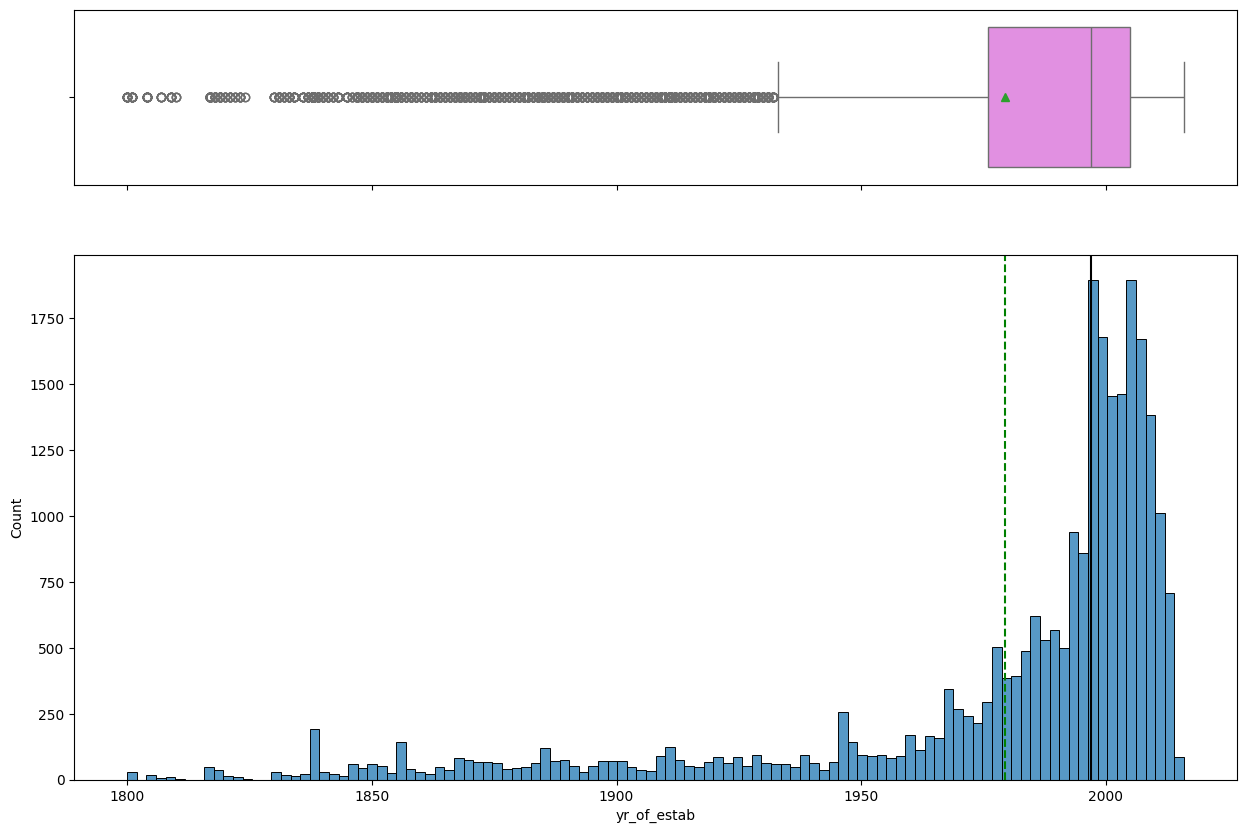

In [98]:
histogram_boxplot(df, "yr_of_estab")

- The median of the year of establish is 1997.
- since the median is greater than the mean, the distribution is left skewed.
- From the boxplot there are alot of small oultliers.

#### prevailing wage

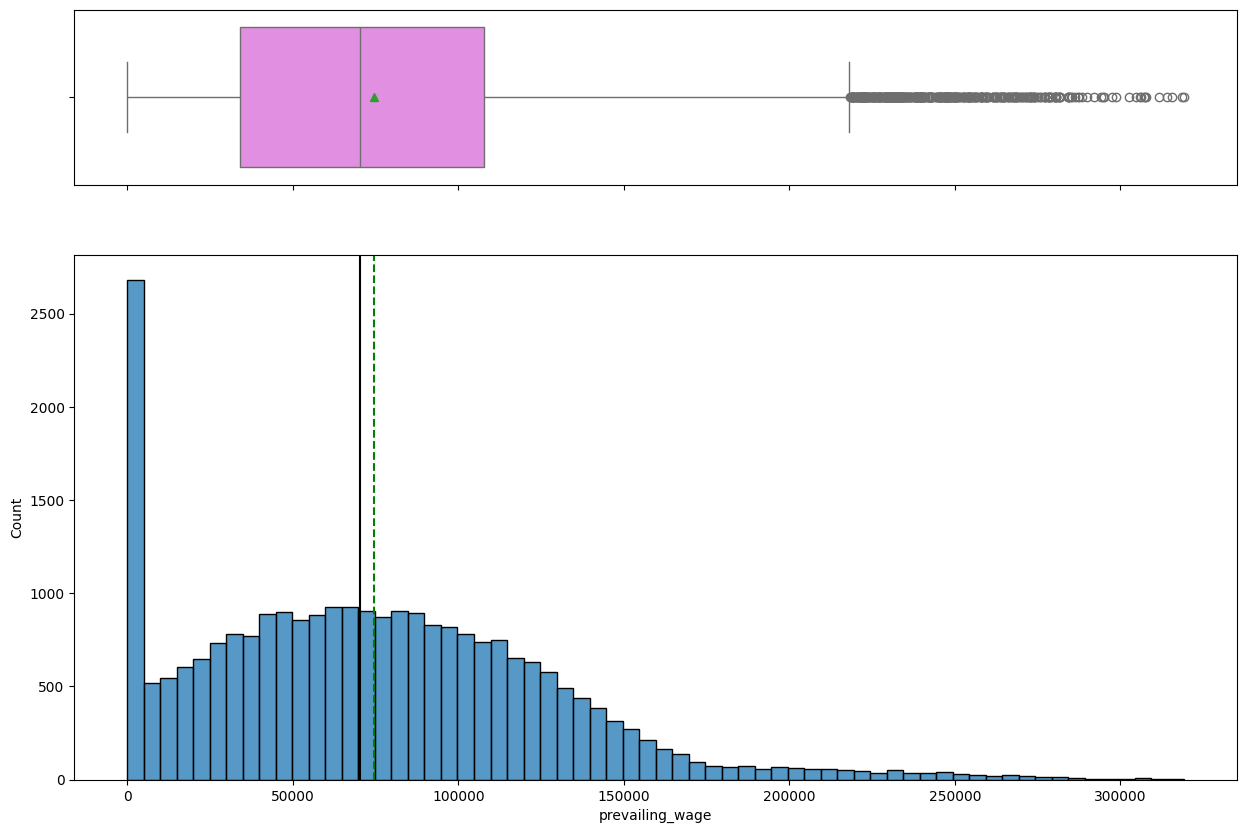

In [99]:
histogram_boxplot(df, "prevailing_wage")

- The mean of the wage paid is 74455 while the median is 70308.
- The distribution is skewed to the right as a result of the efffect of the large outliers.

#### Case status

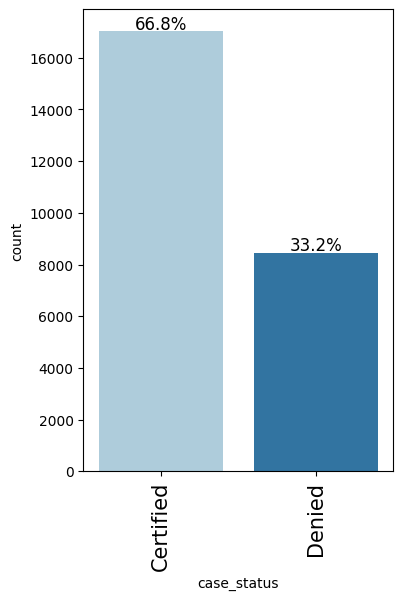

In [100]:
labeled_barplot(df, "case_status", perc=True)

- The percentage of certified visa was 67% while 33% were denied.

#### continent

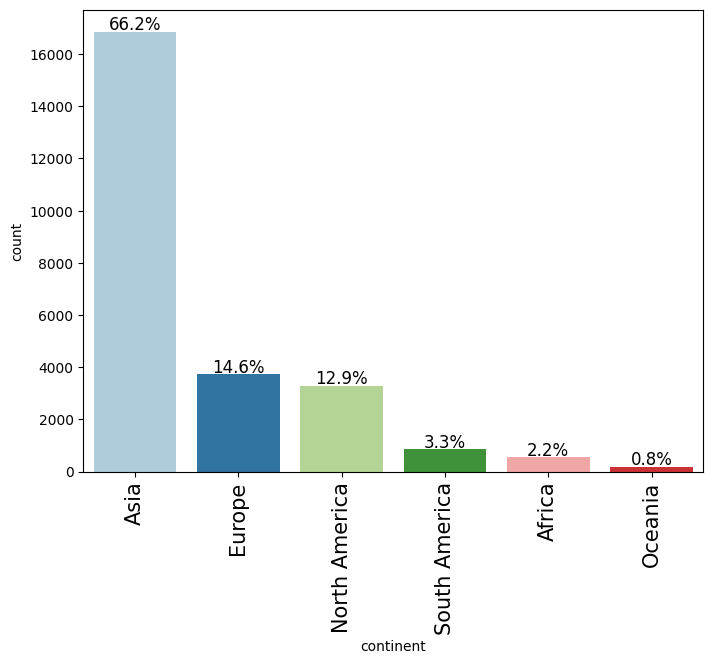

In [101]:
labeled_barplot(df, "continent", perc=True)

- The employees came from 6 different continents, about 66% are from Asia and between 13%-15% from North America and Europe.

#### Education of employee

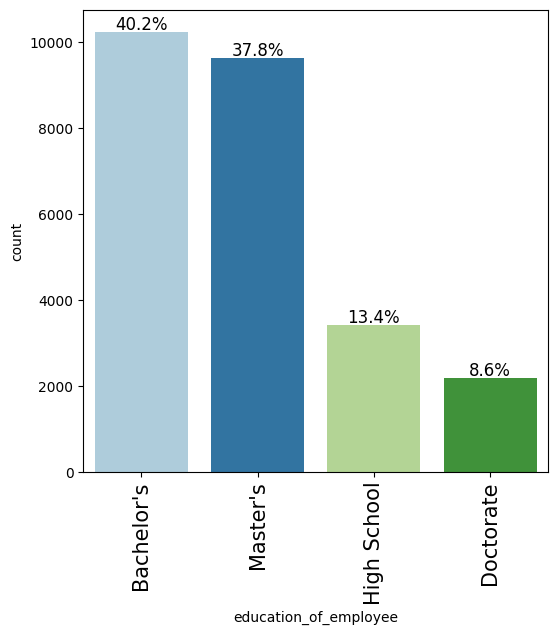

In [102]:
labeled_barplot(df, "education_of_employee", perc=True)

- 40% of the employees have Bachelor degree while 38% have Master degree.

#### Requires job training

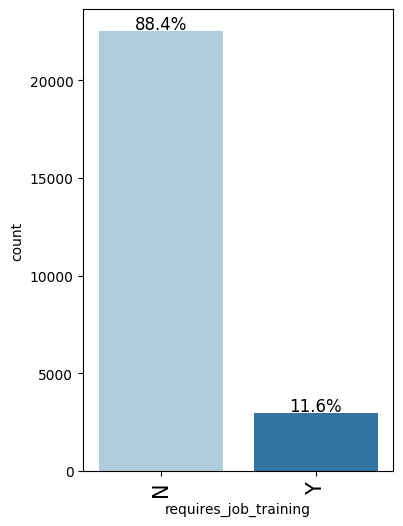

In [103]:
labeled_barplot(df, "requires_job_training", perc=True)

- 88% of the employees do not need job training.

#### Region of employment

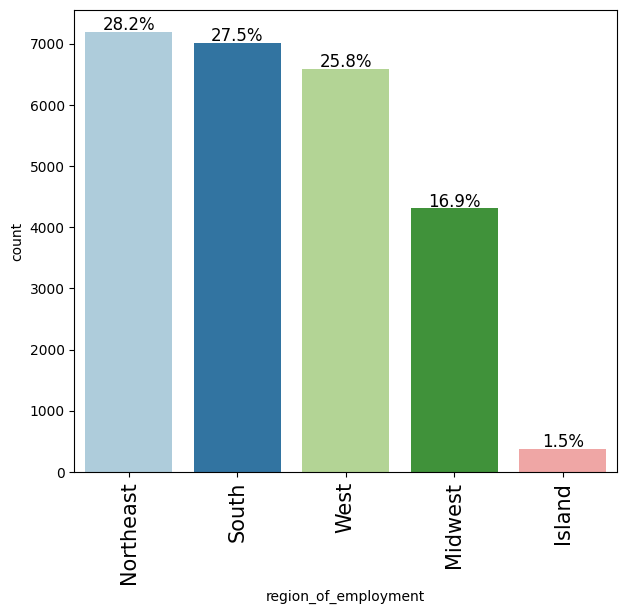

In [104]:
labeled_barplot(df, "region_of_employment", perc=True)

- Foreign workers intended regions Northeast, South and West.

#### Unit of wage

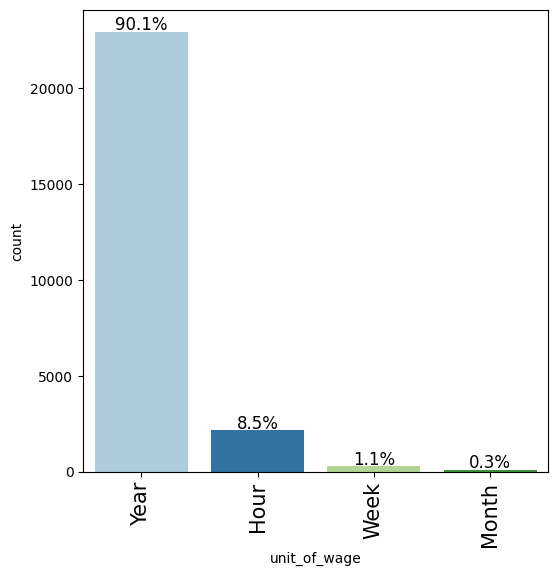

In [105]:
labeled_barplot(df, "unit_of_wage", perc=True)

- 90% of the unit of prevailing wage is yearly and 9% hourly.

#### Full time position

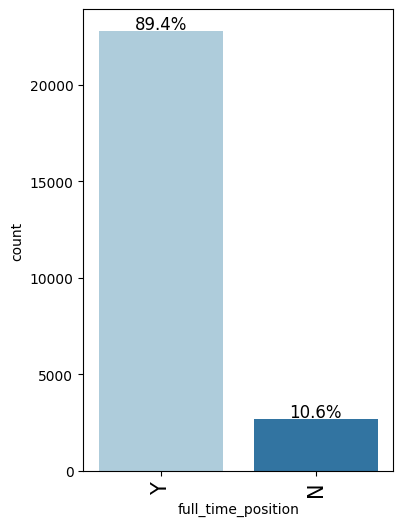

In [106]:
labeled_barplot(df, "full_time_position", perc=True)

- 89% of the work is full-time while the rest is part-time.

### Bivariate Analysis

In [107]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


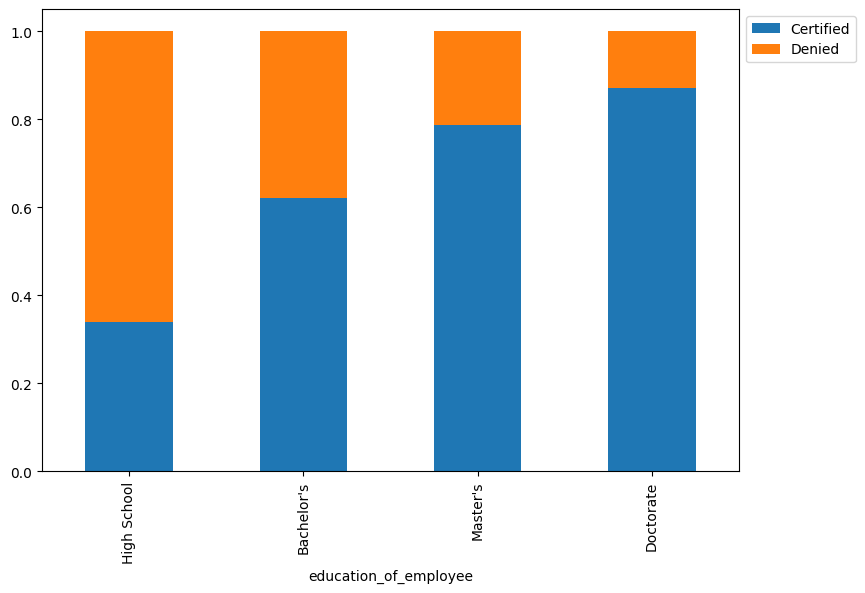

In [108]:
stacked_barplot(df, "education_of_employee", "case_status")

- From the graph: We can say education plays an important role in Visa certification. As the education degree increase the percentage of certified visa increase.

#### How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


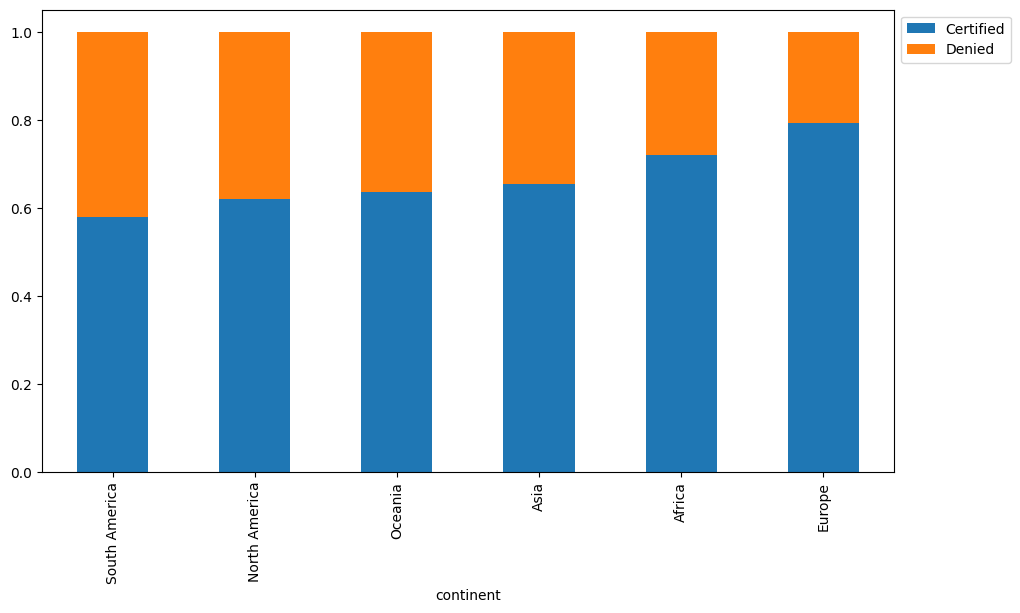

In [109]:
stacked_barplot(df, "continent", "case_status")

- From the graph, 80% of visa applications from Europe certified then Africa.
- Around 60% of the visa apllication from the others continents are denied.


####  Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


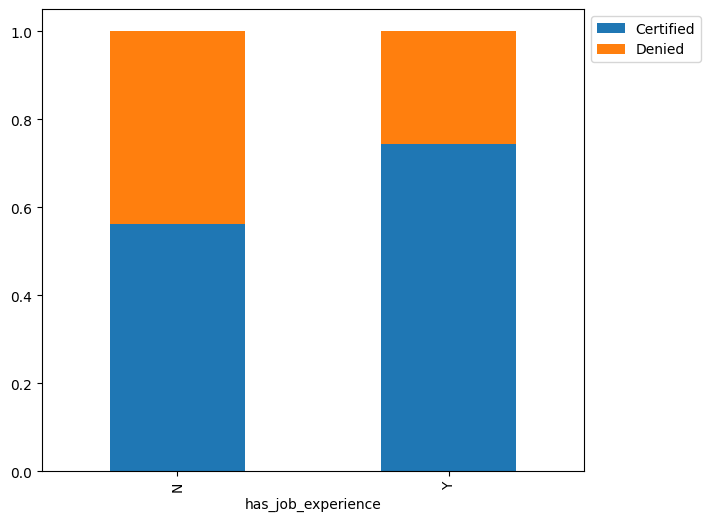

In [110]:
stacked_barplot(df, "has_job_experience", "case_status")

- 74% of employees who have job experience their visa are certified while 56% of employees who have no experience are certified

#### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


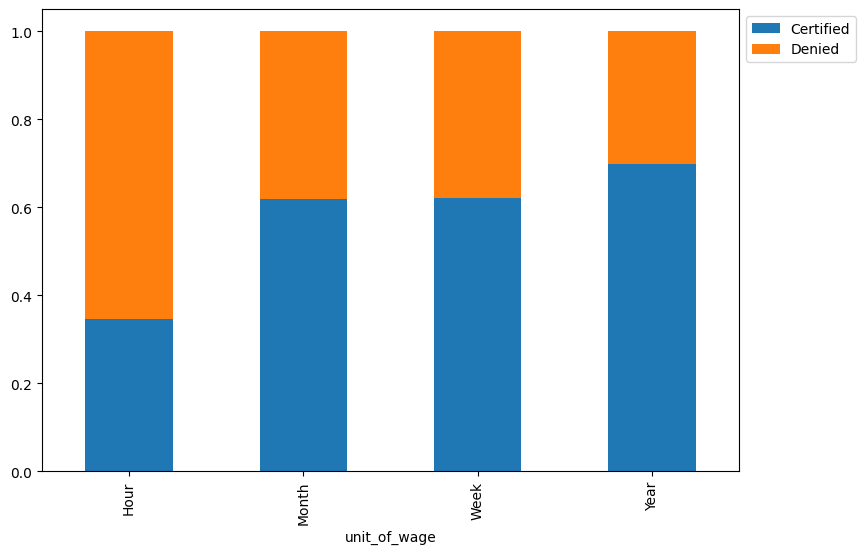

In [111]:
stacked_barplot(df, "unit_of_wage", "case_status")

- From the graph, yearly paied is is most likely to be certified for a visa while the hourly paied is the least one.

#### How does the visa status change with the prevailing wage?

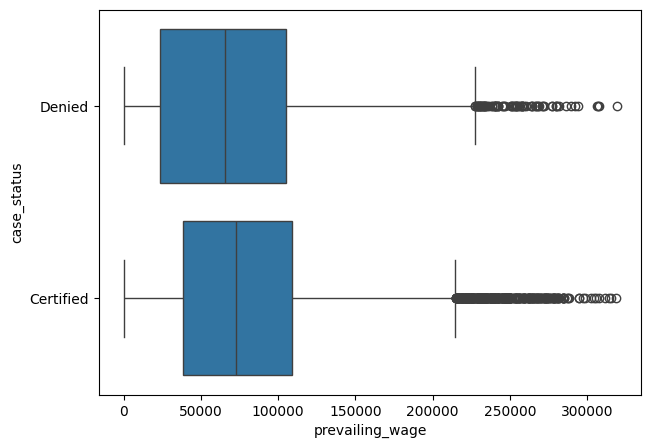

In [112]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x = "prevailing_wage", y = "case_status")
plt.show()

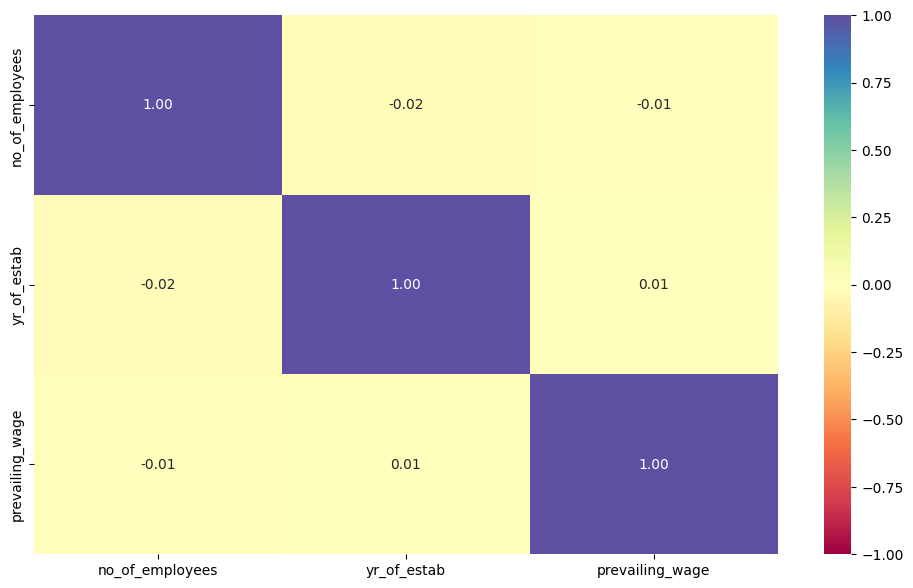

In [113]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is no significant correlation between the columns.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values

In [114]:
# checking for null values
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing values.

### Outliers detection

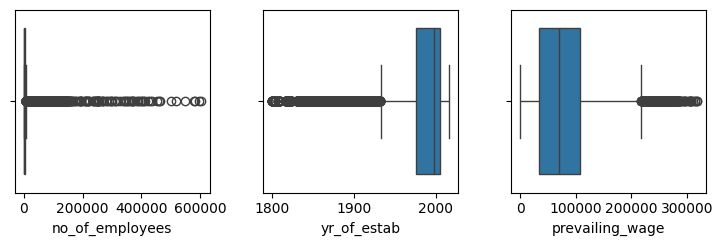

In [115]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data.
- However, we wont treat the outliers.

### Encode Categorical features and Get Dummies

In [116]:
replaceStruct = {
                "education_of_employee": {"High School": 1, "Bachelor's": 2 ,"Master's": 3 ,"Doctorate":4},
                "has_job_experience": {"N": 1, "Y":2},
                 "requires_job_training": {"N": 1, "Y":2},
                 "unit_of_wage":{"Hour": 1, "Week": 2 ,"Month": 3 ,"Year": 4},
                 "full_time_position":     {"N": 1, "Y": 2 },
                 "case_status": {"Denied": 0, "Certified": 1 }
                    }
oneHotCols=["continent","region_of_employment"]

df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,1,1,14513,2007,592.20290,1,2,0,0,1,0,0,0,0,0,0,0,0,1
1,3,2,1,2412,2002,83425.65000,4,2,1,0,1,0,0,0,0,0,0,1,0,0
2,2,1,2,44444,2008,122996.86000,4,2,0,0,1,0,0,0,0,0,0,0,0,1
3,2,1,1,98,1897,83434.03000,4,2,0,0,1,0,0,0,0,0,0,0,0,1
4,3,2,1,1082,2005,149907.39000,4,2,1,1,0,0,0,0,0,0,0,0,1,0
5,3,2,1,2339,2012,78252.14000,4,2,1,0,1,0,0,0,0,0,0,0,1,0
6,2,1,1,4985,1994,53635.39000,4,2,1,0,1,0,0,0,0,0,0,0,1,0
7,2,2,1,3035,1924,418.22980,1,2,0,0,0,0,1,0,0,0,0,0,0,1
8,2,1,1,4810,2012,74362.19000,4,2,1,0,1,0,0,0,0,0,1,0,0,0
9,4,2,1,2251,1995,67514.76000,4,2,1,0,0,1,0,0,0,0,0,0,1,0


### Spliting the data into train and test

In [117]:
# defining X and y variables
x = df.drop(["case_status"], axis=1)
y = df["case_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1,stratify=y)

In [118]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


## Model Performance Evaluation


**Model can make wrong predictions as:**

Predicting a visa is going to be Certified but in reality the visa is should be Denied (FP).

Predicting a booking is going to be Denied but in reality the visa is should be Certified (FN) .

**Which case is more important?**

Both the cases are important as:

If we predict a visa is certified but actually the visa should be denied then a non qualified employee will get the opportunity.

If we predict a visa is denied but in reality it is certified then a qualified employee will lose the opportunity.

**How to reduce this loss?**

We need to reduce both False Negatives and False Positives

f1_score should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

In [119]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target):


    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [120]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Building a Decision Tree Model

In [121]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking performance on training set

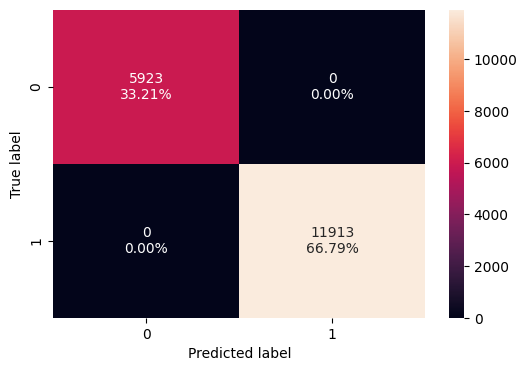

In [122]:
confusion_matrix_sklearn(model, x_train, y_train)

In [123]:
decision_tree_perf_train =model_performance_classification_statsmodels(model, x_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking performance on testing set

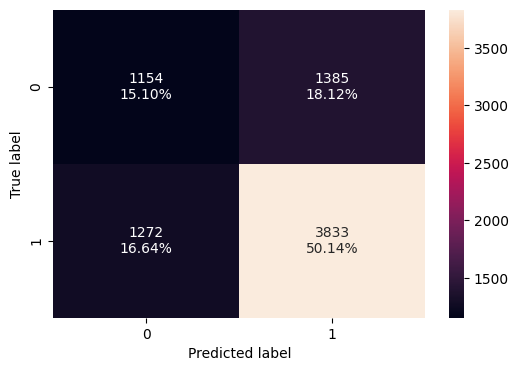

In [124]:
confusion_matrix_sklearn(model, x_test, y_test)

In [125]:
decision_tree_perf_test =model_performance_classification_statsmodels(model, x_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.65241,0.75083,0.73457,0.74261


**Observations:**
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.


### Decision Tree Hyperparameter Tuning

In [126]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

#### Checking performance on training set

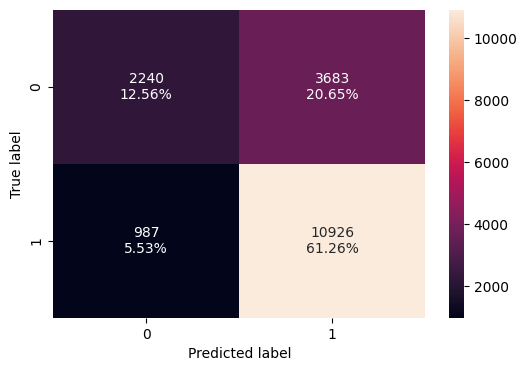

In [127]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [128]:
decision_tree_perf_train_tune =model_performance_classification_statsmodels(estimator, x_train, y_train)
decision_tree_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.73817,0.91715,0.74790,0.82392


#### Checking performance on testing set

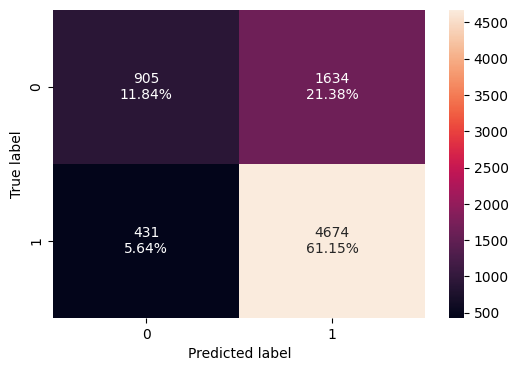

In [129]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [130]:
decision_tree_perf_test_tune =model_performance_classification_statsmodels(estimator, x_test, y_test)
decision_tree_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.72985,0.91557,0.74096,0.81907


**Observations:**
- There is no overfitting after the hyperparameter tuning.
- The result of F1 is improved after the hyperparameter tuning.

### Building Bagging Classifier Model

In [131]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

#### Checking performance on training set

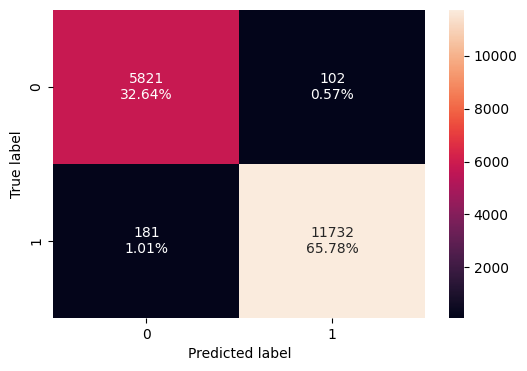

In [132]:
confusion_matrix_sklearn(bagging, x_train, y_train)

In [133]:
bagging_perf_train = model_performance_classification_statsmodels(bagging, x_train, y_train)
bagging_perf_train

,Accuracy,Recall,Precision,F1
0,0.98413,0.98481,0.99138,0.98808


#### Checking performance on testing set

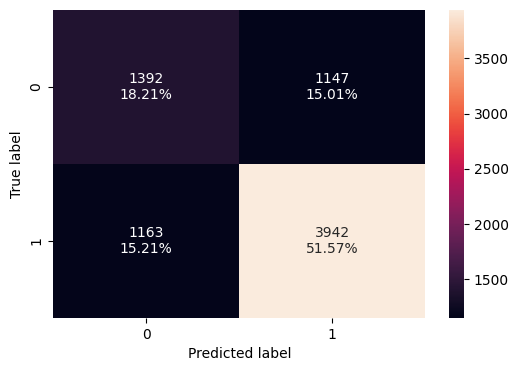

In [134]:
confusion_matrix_sklearn(bagging, x_test, y_test)

In [135]:
bagging_perf_test = model_performance_classification_statsmodels(bagging, x_test, y_test)
bagging_perf_test

,Accuracy,Recall,Precision,F1
0,0.69780,0.77218,0.77461,0.77340


**Observations:**
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.


### Bagging Hyperparameter Tuning

In [136]:
# Choose the type of classifier.
bagging_estimator = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

#### Checking performance on training set

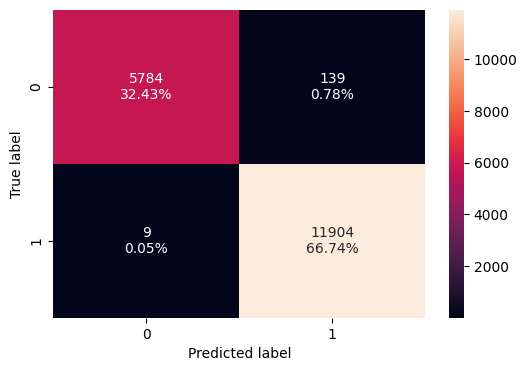

In [137]:
confusion_matrix_sklearn(bagging_estimator, x_train, y_train)

In [138]:
bagging_perf_train_tune = model_performance_classification_statsmodels(bagging_estimator, x_train, y_train)
bagging_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.99170,0.99924,0.98846,0.99382


#### Checking performance on testing set

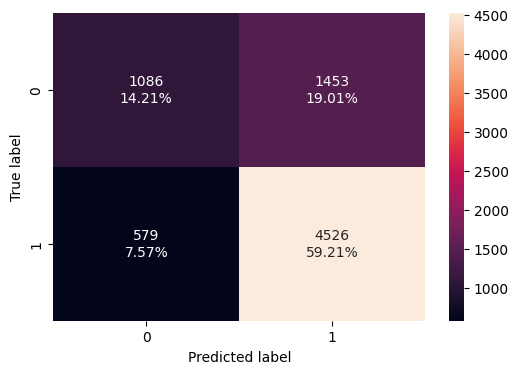

In [139]:
confusion_matrix_sklearn(bagging_estimator, x_test, y_test)

In [140]:
bagging_perf_test_tune = model_performance_classification_statsmodels(bagging_estimator, x_test, y_test)
bagging_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.73417,0.88658,0.75698,0.81667


**Observations:**
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.


### Building Random Forest Model

In [141]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking performance on training set

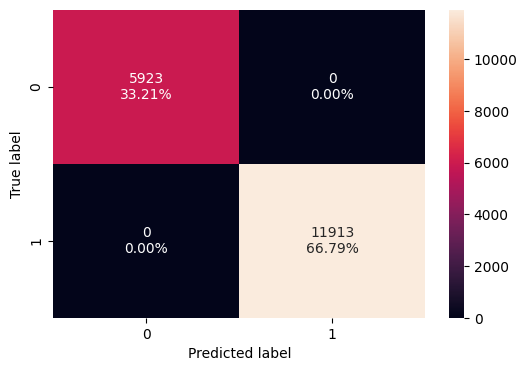

In [142]:
confusion_matrix_sklearn(rf, x_train, y_train)

In [143]:
rf_train = model_performance_classification_statsmodels(rf, x_train, y_train)
rf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


#### Checking performance on testing set

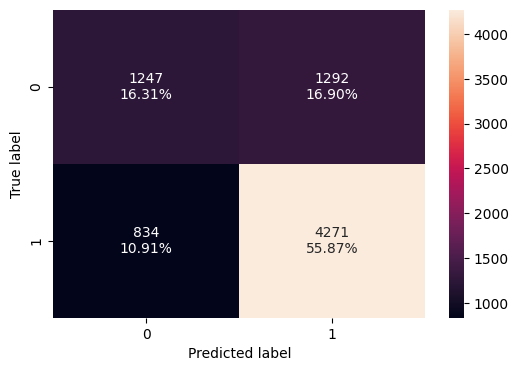

In [144]:
confusion_matrix_sklearn(rf, x_test, y_test)

In [145]:
rf_test = model_performance_classification_statsmodels(rf, x_test, y_test)
rf_test

,Accuracy,Recall,Precision,F1
0,0.72187,0.83663,0.76775,0.80071


**Observations:**
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.


### Random Forest Hyperparameter Tuning

In [146]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

#### Checking performance on training set

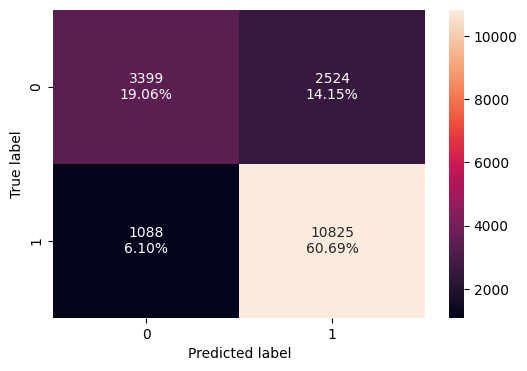

In [147]:
confusion_matrix_sklearn(rf_estimator, x_train, y_train)

In [148]:
rf_perf_train_tune = model_performance_classification_statsmodels(rf_estimator, x_train, y_train)
rf_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.79749,0.90867,0.81092,0.85702


#### Checking performance on testing set

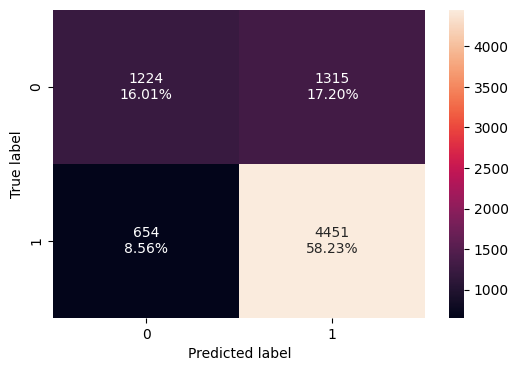

In [149]:
confusion_matrix_sklearn(rf_estimator, x_test, y_test)

In [150]:
rf_perf_test_tune = model_performance_classification_statsmodels(rf_estimator, x_test, y_test)
rf_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.74241,0.87189,0.77194,0.81888


**Observations:**
- The model is slightly overfitting but the accuracy is not high.
- The F1 improvement is weak.

### Building AdaBoosting Model

In [151]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking performance on training set

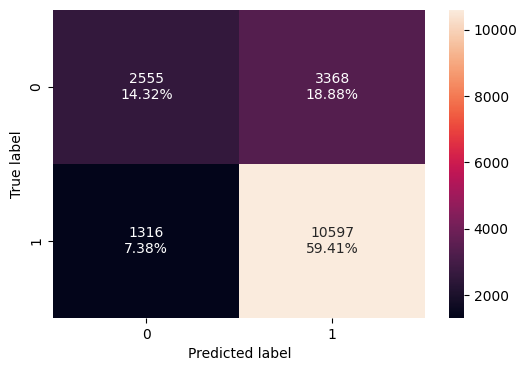

In [152]:
confusion_matrix_sklearn(ada, x_train, y_train)

In [153]:
ada_perf_train = model_performance_classification_statsmodels(ada, x_train, y_train)
ada_perf_train

,Accuracy,Recall,Precision,F1
0,0.73739,0.88953,0.75883,0.81900


#### Checking performance on testing set

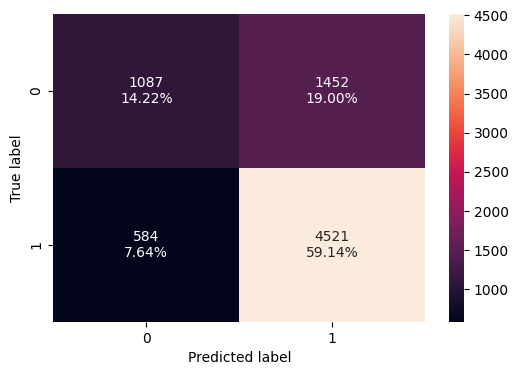

In [154]:
confusion_matrix_sklearn(ada, x_test, y_test)

In [155]:
ada_perf_test = model_performance_classification_statsmodels(ada, x_test, y_test)
ada_perf_test

,Accuracy,Recall,Precision,F1
0,0.73365,0.88560,0.75691,0.81621



- The model is not overfitting and generalizes well.

### AdaBoosting Hyperparameter Tuning

In [156]:
# Choose the type of classifier.
ada_estimator = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(ada_estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ada_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_estimator.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

#### Checking performance on training set

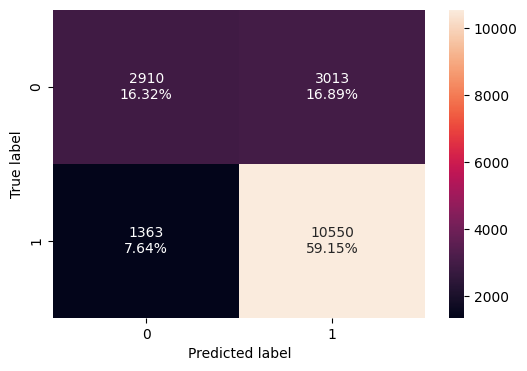

In [157]:
confusion_matrix_sklearn(ada_estimator, x_train, y_train)

In [158]:
ada_perf_train_tune = model_performance_classification_statsmodels(ada_estimator, x_train, y_train)
ada_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.75465,0.88559,0.77785,0.82823


#### Checking performance on testing set

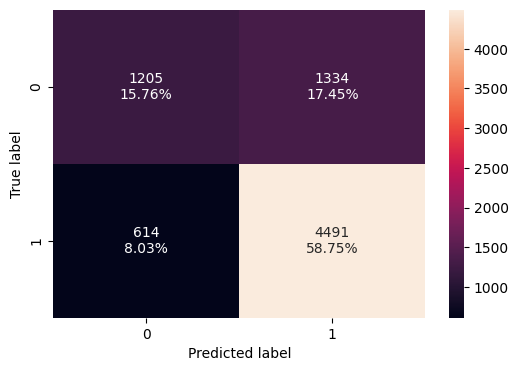

In [159]:
confusion_matrix_sklearn(ada_estimator, x_test, y_test)

In [160]:
ada_perf_test_tune = model_performance_classification_statsmodels(ada_estimator, x_test, y_test)
ada_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.74516,0.87973,0.77099,0.82177


- The tuned model is not overfitting and generalizes well.

### Gradient Boosting Model

In [161]:
gradient = GradientBoostingClassifier(random_state=1)
gradient.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking performance on training set

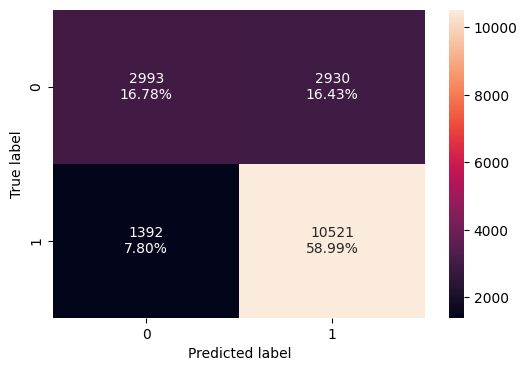

In [162]:
confusion_matrix_sklearn(gradient, x_train, y_train)

In [163]:
gradient_perf_train = model_performance_classification_statsmodels(gradient, x_train, y_train)
gradient_perf_train

,Accuracy,Recall,Precision,F1
0,0.75768,0.88315,0.78217,0.82960


#### Checking performance on testing set

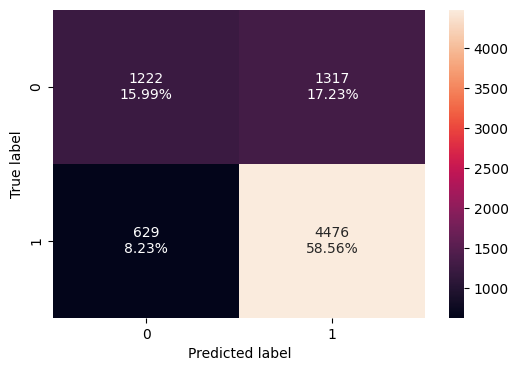

In [164]:
confusion_matrix_sklearn(gradient, x_test, y_test)

In [165]:
gradient_perf_test = model_performance_classification_statsmodels(gradient, x_test, y_test)
gradient_perf_test

,Accuracy,Recall,Precision,F1
0,0.74542,0.87679,0.77266,0.82144


- The model is not overfitting and generalizes well.

### Gradient Boosting Hyperparameter Tuning

In [166]:
# Choose the type of classifier.
gradient_estimator = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(gradient_estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gradient_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradient_estimator.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.7)

#### Checking performance on training set

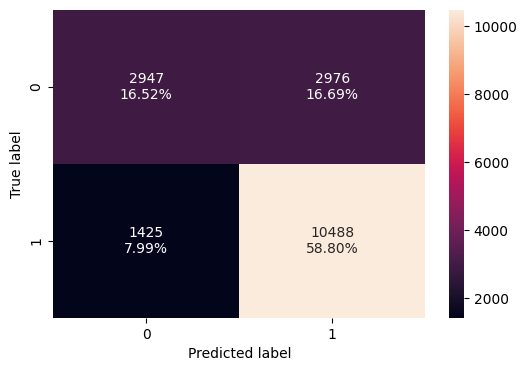

In [167]:
confusion_matrix_sklearn(gradient_estimator, x_train, y_train)

In [168]:
gradient_perf_train_tune = model_performance_classification_statsmodels(gradient_estimator, x_train, y_train)
gradient_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.75325,0.88038,0.77897,0.82658


#### Checking performance on testing set

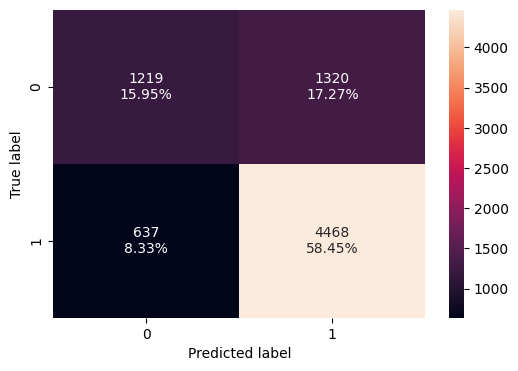

In [169]:
confusion_matrix_sklearn(gradient_estimator, x_test, y_test)

In [170]:
gradient_perf_test_tune = model_performance_classification_statsmodels(gradient_estimator, x_test, y_test)
gradient_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.74398,0.87522,0.77194,0.82034


- There is no significant difference after the hyperparameter tuning.

### XGBoosting Model

In [171]:
xgb =XGBClassifier(random_state=1, verbosity = 0)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Checking performance on training set

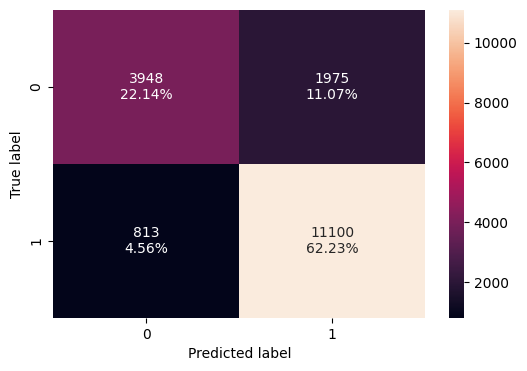

In [172]:
confusion_matrix_sklearn(xgb, x_train, y_train)

In [173]:
xgb_perf_train  = model_performance_classification_statsmodels(xgb, x_train, y_train)
xgb_perf_train

,Accuracy,Recall,Precision,F1
0,0.84369,0.93176,0.84895,0.88843


#### Checking performance on testing set

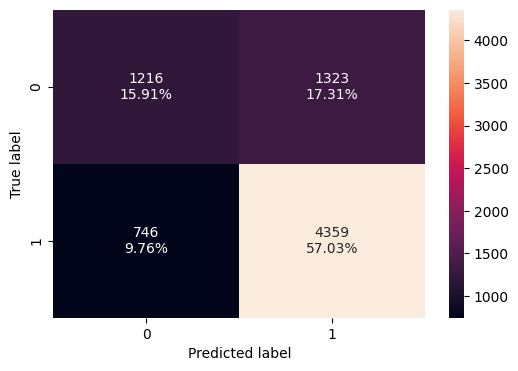

In [174]:
confusion_matrix_sklearn(xgb, x_test, y_test)

In [175]:
xgb_perf_test = model_performance_classification_statsmodels(xgb, x_test, y_test)
xgb_perf_test

,Accuracy,Recall,Precision,F1
0,0.72933,0.85387,0.76716,0.80820


- The model is overfitting.

### XGBoosting Hyperparameter Tuning

In [176]:
# Choose the type of classifier.
xgb_estimator = XGBClassifier(random_state=1)

# Grid of parameters to choose from
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_estimator.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Checking performance on training set

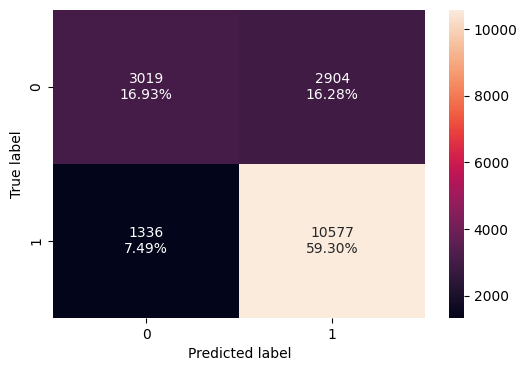

In [177]:
confusion_matrix_sklearn(xgb_estimator, x_train, y_train)

In [178]:
xgb_perf_train_tune = model_performance_classification_statsmodels(xgb_estimator, x_test, y_test)
xgb_perf_train_tune

,Accuracy,Recall,Precision,F1
0,0.74594,0.87757,0.77281,0.82187


#### Checking performance on testing set

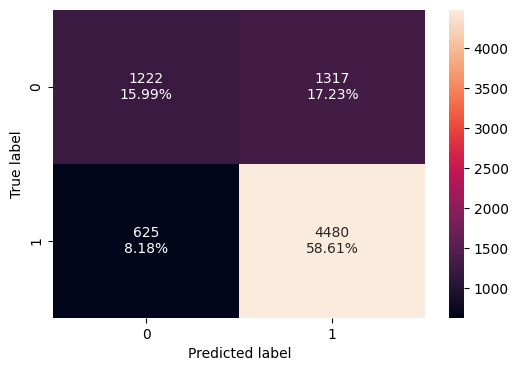

In [179]:
confusion_matrix_sklearn(xgb_estimator, x_test, y_test)

In [180]:
xgb_perf_test_tune = model_performance_classification_statsmodels(xgb_estimator, x_test, y_test)
xgb_perf_test_tune

,Accuracy,Recall,Precision,F1
0,0.74594,0.87757,0.77281,0.82187


- The model is not overfitting and generalizes well.

### Stacking Model

In [181]:
estimators=[('Ada Bossting', ada_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gradient_estimator)]
final_estimator=XGBClassifier(random_state=1)

stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Ada Bossting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

#### Checking performance on training set

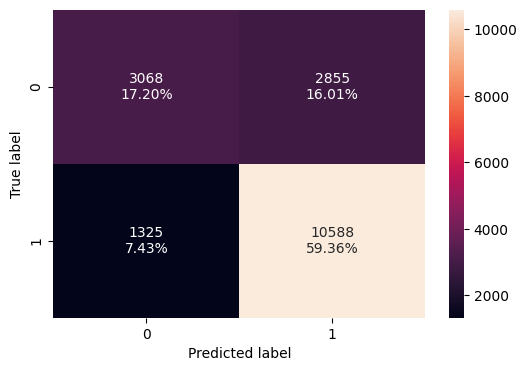

In [182]:
confusion_matrix_sklearn(stacking_estimator, x_train, y_train)

In [183]:
stack_perf_train = model_performance_classification_statsmodels(stacking_estimator, x_train, y_train)
stack_perf_train

,Accuracy,Recall,Precision,F1
0,0.76564,0.88878,0.78762,0.83515


#### Checking performance on testing set

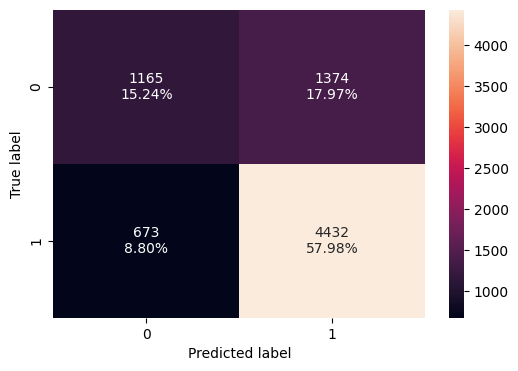

In [184]:
confusion_matrix_sklearn(stacking_estimator, x_test, y_test)

In [185]:
stack_perf_test = model_performance_classification_statsmodels(stacking_estimator, x_test, y_test)
stack_perf_test

,Accuracy,Recall,Precision,F1
0,0.73221,0.86817,0.76335,0.81239


**Observations:**
- The model is slightly overfitting.


## Model Performance Comparison and Conclusions

In [186]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        decision_tree_perf_train.T,
        decision_tree_perf_train_tune.T,
        bagging_perf_train.T,
        bagging_perf_train_tune.T,
        rf_train.T,
        rf_perf_train_tune.T,
        ada_perf_train.T,
        ada_perf_train_tune.T,
        gradient_perf_train.T,
        gradient_perf_train_tune.T,
        xgb_perf_train.T,
        xgb_perf_train_tune.T,
        stack_perf_train.T


    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00000,0.73817,0.98413,0.99170,1.00000,0.79749,0.73739,0.75465,0.75768,0.75325,0.84369,0.74594,0.76564
Recall,1.00000,0.91715,0.98481,0.99924,1.00000,0.90867,0.88953,0.88559,0.88315,0.88038,0.93176,0.87757,0.88878
Precision,1.00000,0.74790,0.99138,0.98846,1.00000,0.81092,0.75883,0.77785,0.78217,0.77897,0.84895,0.77281,0.78762
F1,1.00000,0.82392,0.98808,0.99382,1.00000,0.85702,0.81900,0.82823,0.82960,0.82658,0.88843,0.82187,0.83515


In [187]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [

        decision_tree_perf_test.T,
        decision_tree_perf_test_tune.T,
        bagging_perf_test.T,
        bagging_perf_test_tune.T,
        rf_test.T,
        rf_perf_test_tune.T,
        ada_perf_test.T,
        ada_perf_test_tune.T,
        gradient_perf_test.T,
        gradient_perf_test_tune.T,
        xgb_perf_test.T,
        xgb_perf_test_tune.T,
        stack_perf_test.T


    ],
    axis=1,
)
models_test_comp_df.columns = [

    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.65241,0.72985,0.69780,0.73417,0.72187,0.74241,0.73365,0.74516,0.74542,0.74398,0.72933,0.74594,0.73221
Recall,0.75083,0.91557,0.77218,0.88658,0.83663,0.87189,0.88560,0.87973,0.87679,0.87522,0.85387,0.87757,0.86817
Precision,0.73457,0.74096,0.77461,0.75698,0.76775,0.77194,0.75691,0.77099,0.77266,0.77194,0.76716,0.77281,0.76335
F1,0.74261,0.81907,0.77340,0.81667,0.80071,0.81888,0.81621,0.82177,0.82144,0.82034,0.80820,0.82187,0.81239



- The tuned AdaBoost, The Gradient Boost,The tuned Gradient Boost and The tuned XGBoost are the top 4 models. They are all giving a similar performance.
- The Accuracy in all the models is around 0.74 and F1 is around 0.82.
- Since XGBosst is an optimized version of gradient boost, we will choose it as the best model.

### Important features of XGBoost model

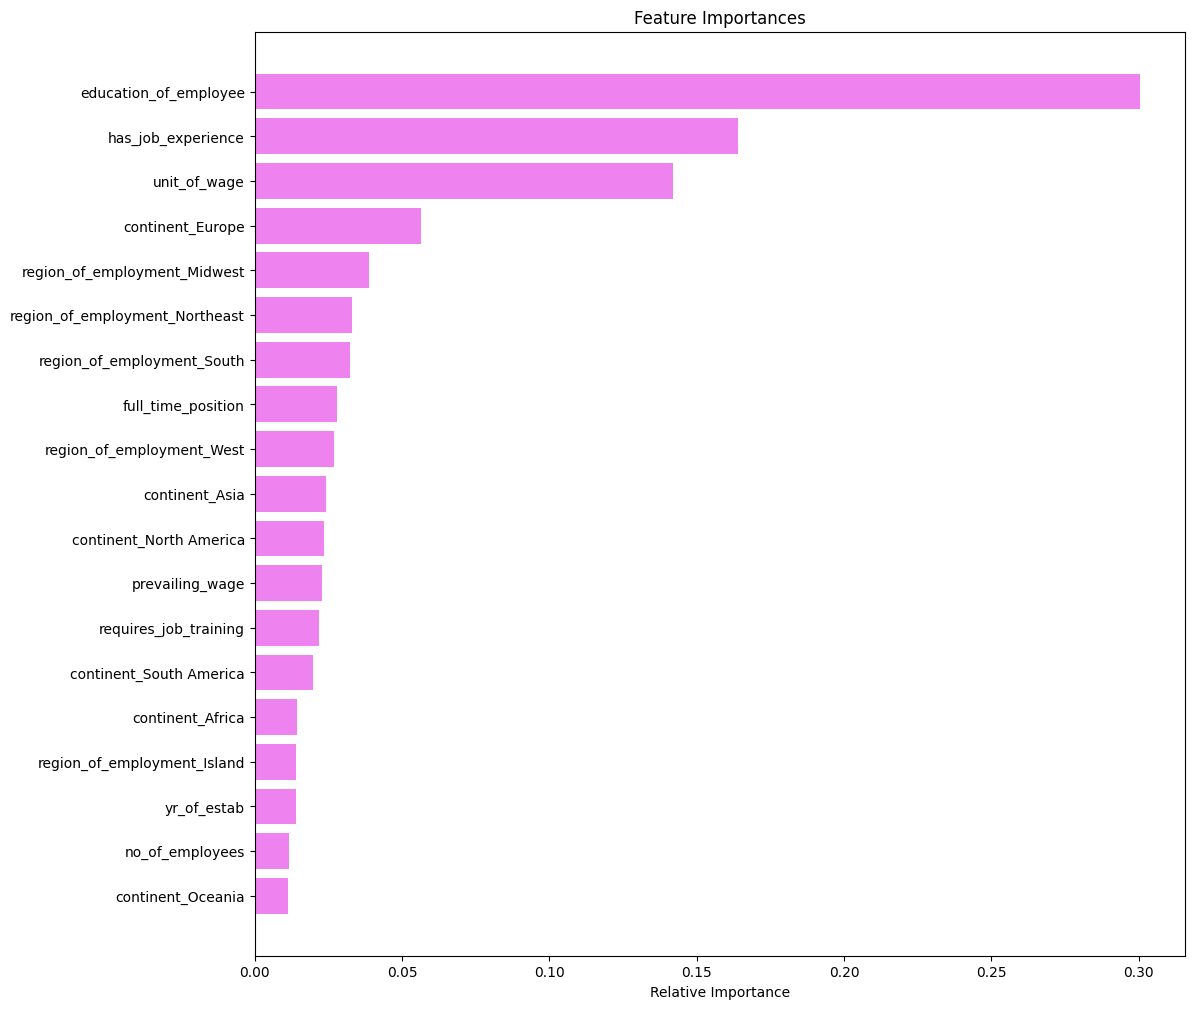

In [188]:
importances = xgb_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top 3 important features are:
*   Education of the employee.
*   Job experience.
*   Unit of wage.

## Actionable Insights and Recommendations

1. To facilitate the process of visa approvals, The most important factors required for work visas to assess the applicant’s skills and qualification are:

   * Education level: education plays an important role in Visa certification. As
the education degree increase the percentage of certified visa increase.
   * Job Experiance: An application with experience has a greater chance of obtaining a visa than one who has no previous experience.
   * Unit of prevailing wage: yearly paied is is most likely to be certified for a visa while the hourly paied is the least one.

2. Applicants from Europe have higher chances of visa certification.

3. Additional information can be collected to gain better insights such as region of employment in the US and the position of work is full-time.

4. Less influential factors are Number of employees in the employer's company and people from Oceania continent.

5. Applications with education level less than high school, no job experiance and hourly paied should be denied.






